# PotHole Detection using YOLOv8

In [ ]:
!pip install ultralytics==8.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.7 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144573 sha256=397169ef182e7014ed7c03ec44db6fb27644b2929c82dd22669d171afb0c43c0
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Succes

## Load DataSet

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi
import os

os.environ['KAGGLE_USERNAME'] = "gerardoguzman"                 #Manually input from kaggle
os.environ['KAGGLE_KEY'] = "9bdc84488503f9663937a57a7531089e"   #Manually input from kaggle

api = KaggleApi()
api.authenticate()

api.dataset_download_files('sachinpatel21/pothole-image-dataset', path="./data/", unzip=True)
del api

## Roboflow for Image Annotation

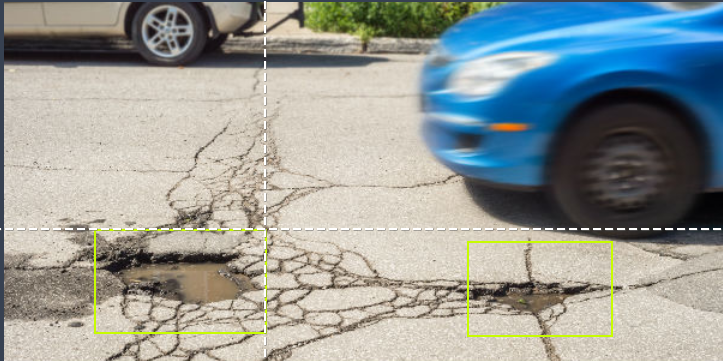

In [ ]:
!pip install Roboflow
from roboflow import Roboflow

%cd data
rf = Roboflow(api_key="Z5Qe8KXhzlPQkLX0sUx3")
project = rf.workspace("gerapothole").project("pothole-detection-yolov8")
dataset = project.version(1).download("yolov5")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=c905c2ba65d68468fdc963707900226f87f7bc08b3407b287badb8fe26174e7a
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

/content/data
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Pothole-detection-YOLOv8-1 in yolov5pytorch:: 100%|██████████| 2866/2866 [00:01<00:00, 2337.75it/s]


## Train Model

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=./data/Pothole-detection-YOLOv8-1/data.yaml epochs=70 imgsz=640 verbose=True show=True

yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=./data/Pothole-detection-YOLOv8-1/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=True, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmu

## Confusion Matrix

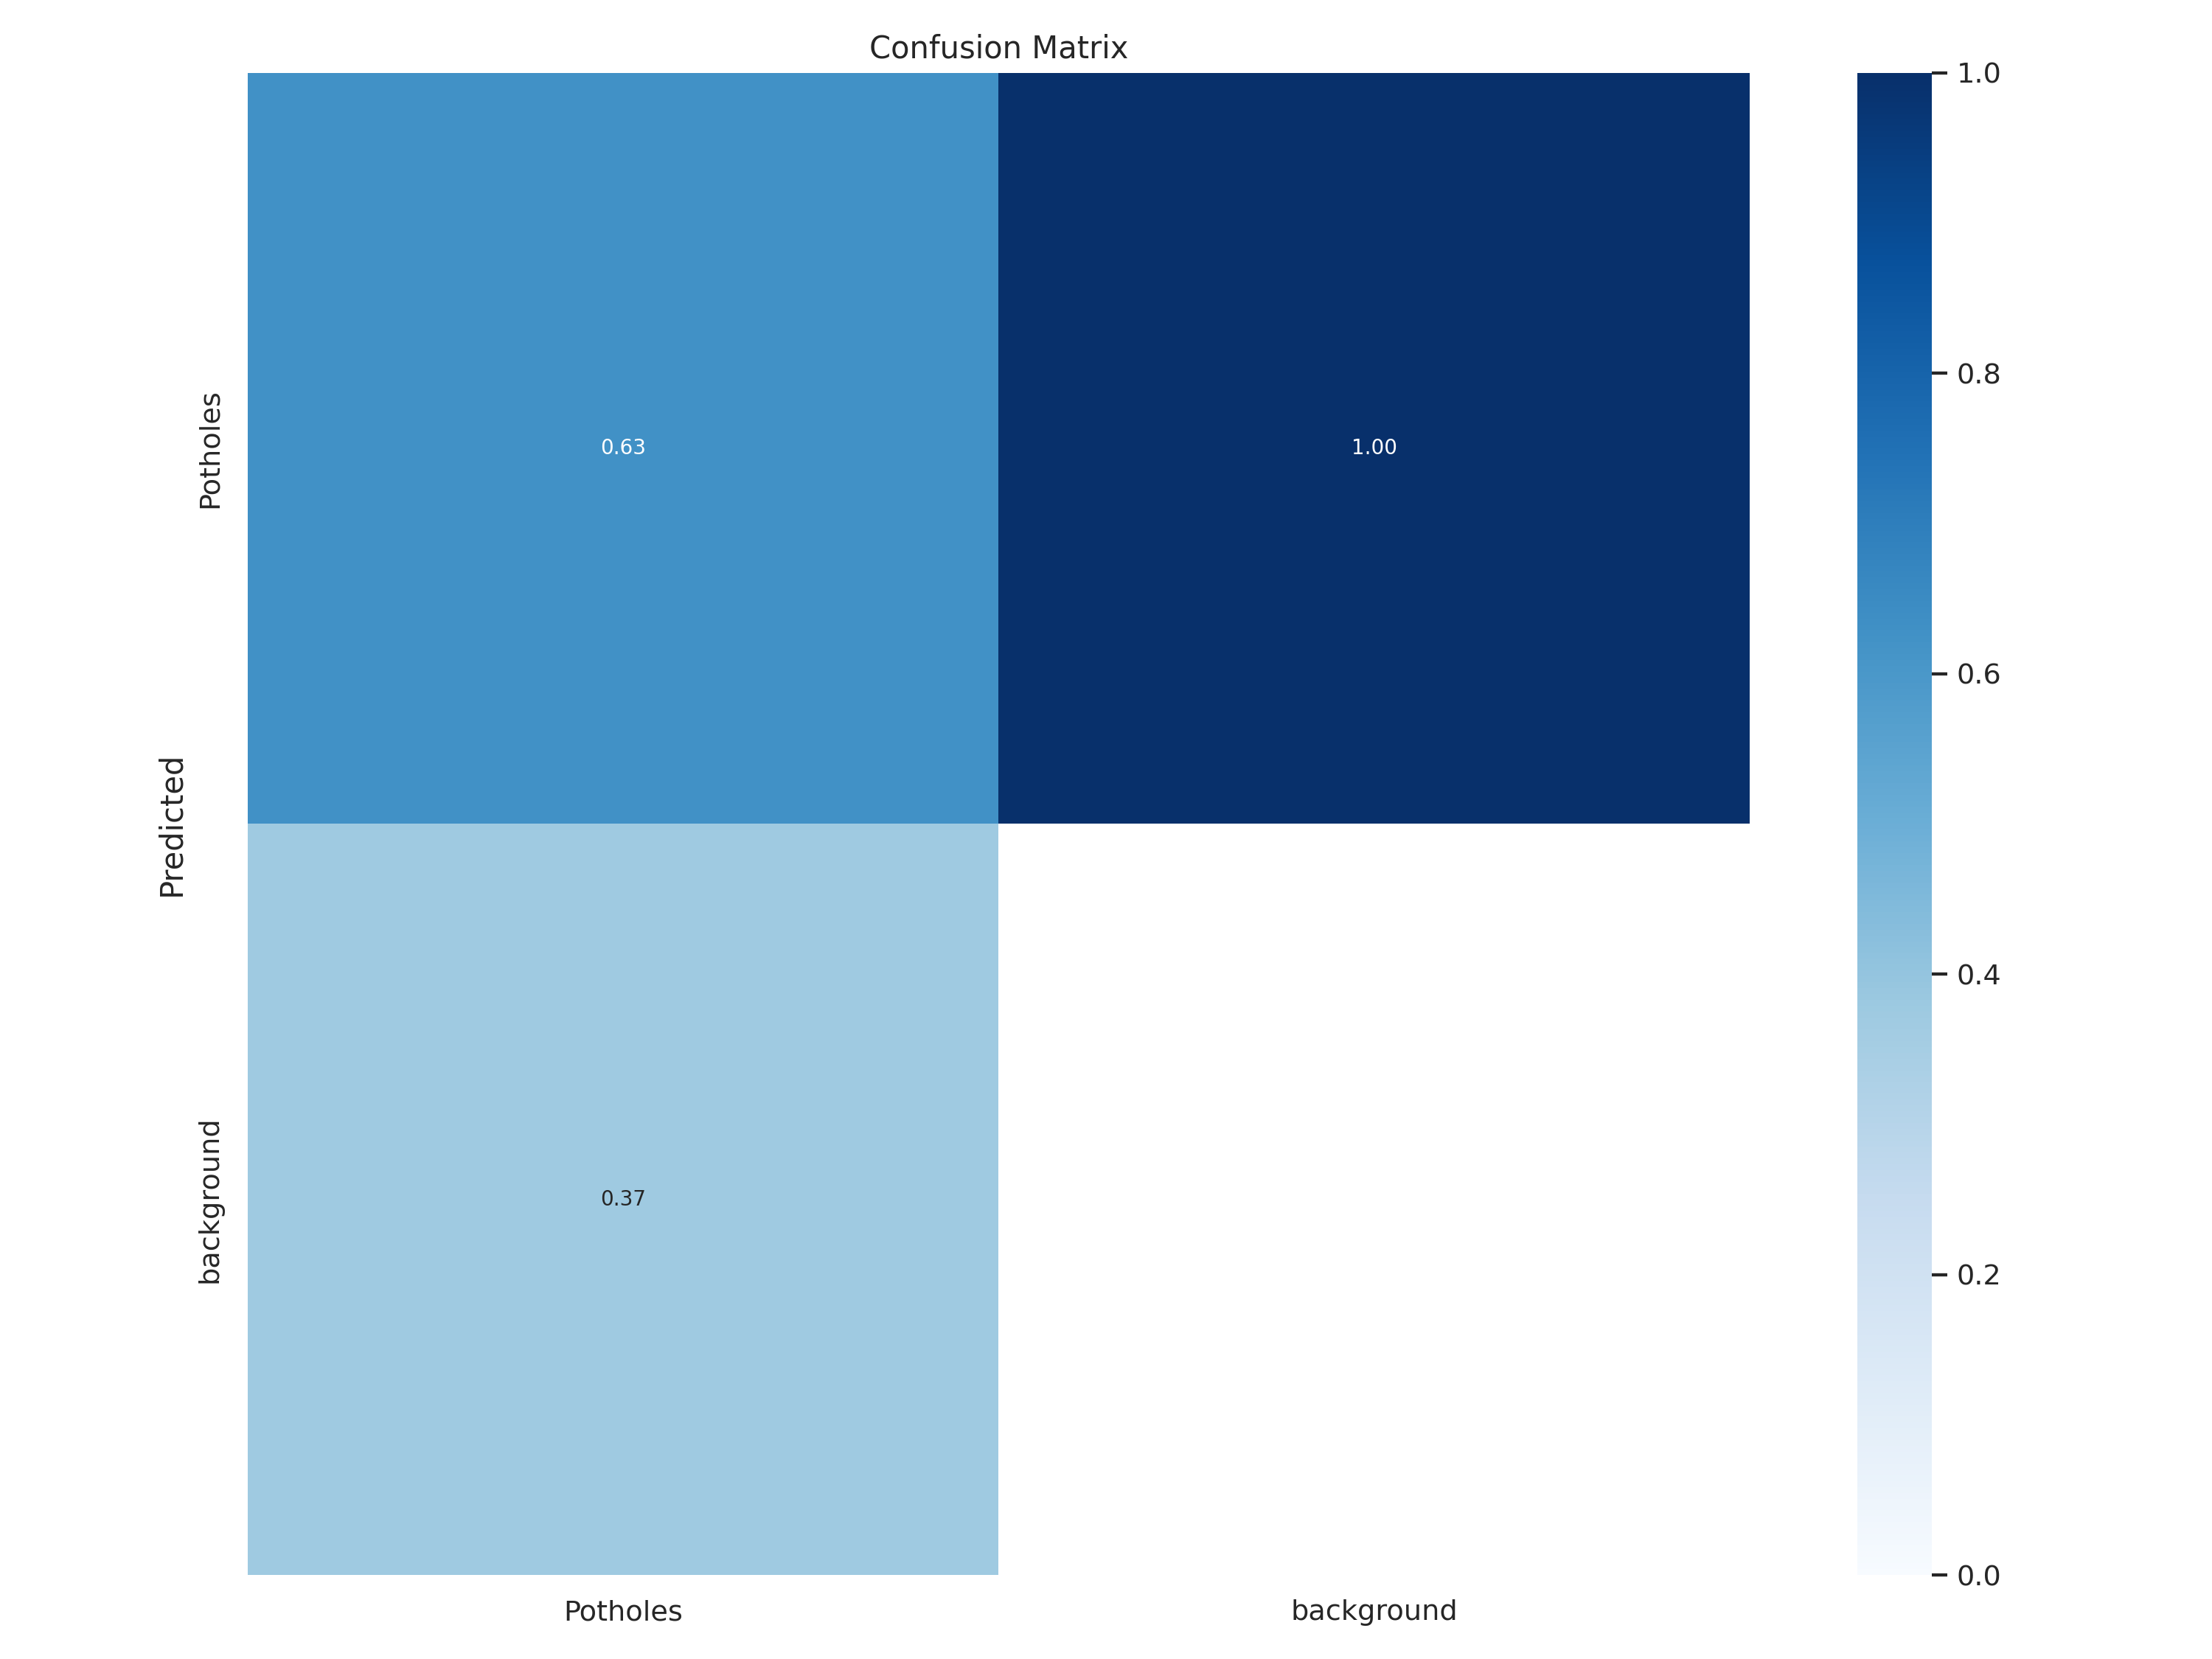

In [ ]:
from PIL import Image
Image.open('./runs/detect/train3/confusion_matrix.png')

## Results

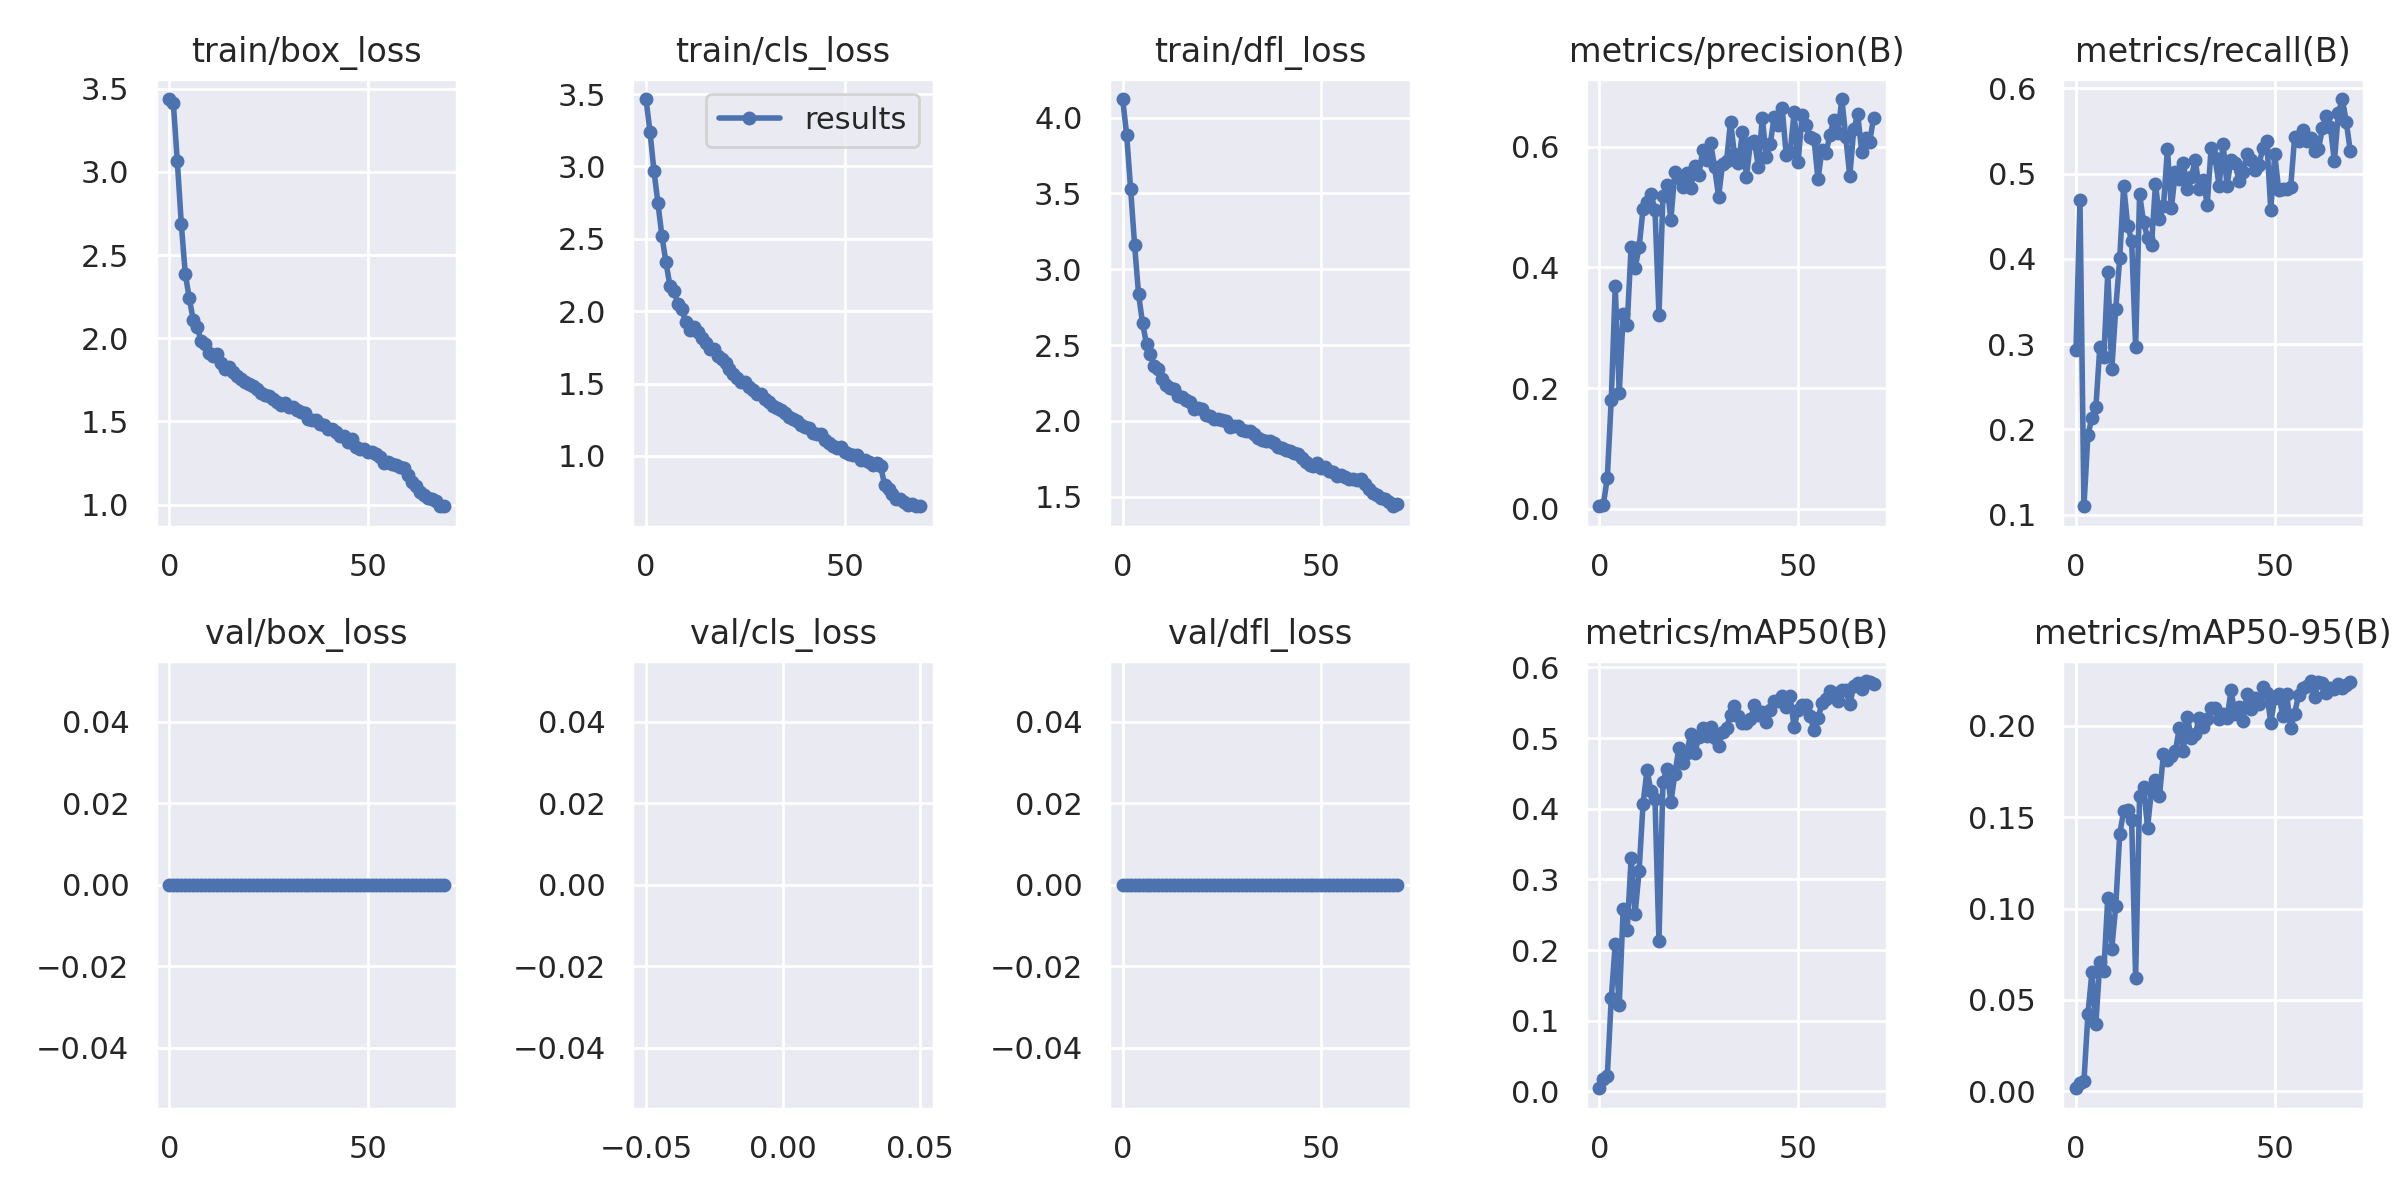

In [ ]:
Image.open('./runs/detect/train3/results.png')

## Validation of Custom Model

In [ ]:
!yolo task=detect model=val model=./runs/detect/train3/weights/best.pt data=./data/Pothole-detection-YOLOv8-1/data.yaml

yolo/engine/trainer: task=detect, mode=train, model=./runs/detect/train3/weights/best.pt, data=./data/Pothole-detection-YOLOv8-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0

## Testing our model

In [ ]:
!yolo task=detect mode=predict model=./runs/detect/train4/weights/best.pt conf=0.35 source=./data/Pothole-detection-YOLOv8-1/test/images

2023-05-03 23:54:56.898813: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 23:54:58.701175: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
image 1/62 /content/data/Pothole-detection-YOLOv8-1/test/images/105_jpg.rf.469ae9ab85071ee9ef82551983eae116.jpg: 640x640 37.1ms
image 2/62 /content/data/Pothole-detection-YOLOv8-1/test/images/108_jpg.rf.984d35879b6e4be87655c3f5ceee8ef9.jpg: 640x640 5 Potholess, 39.9ms
image 3/62 /content/data/Pothole-detection-YOLOv8-1/test/images/112_jpg.rf.2ff33cc86569fc9e8a54b389a6235e1f.jp

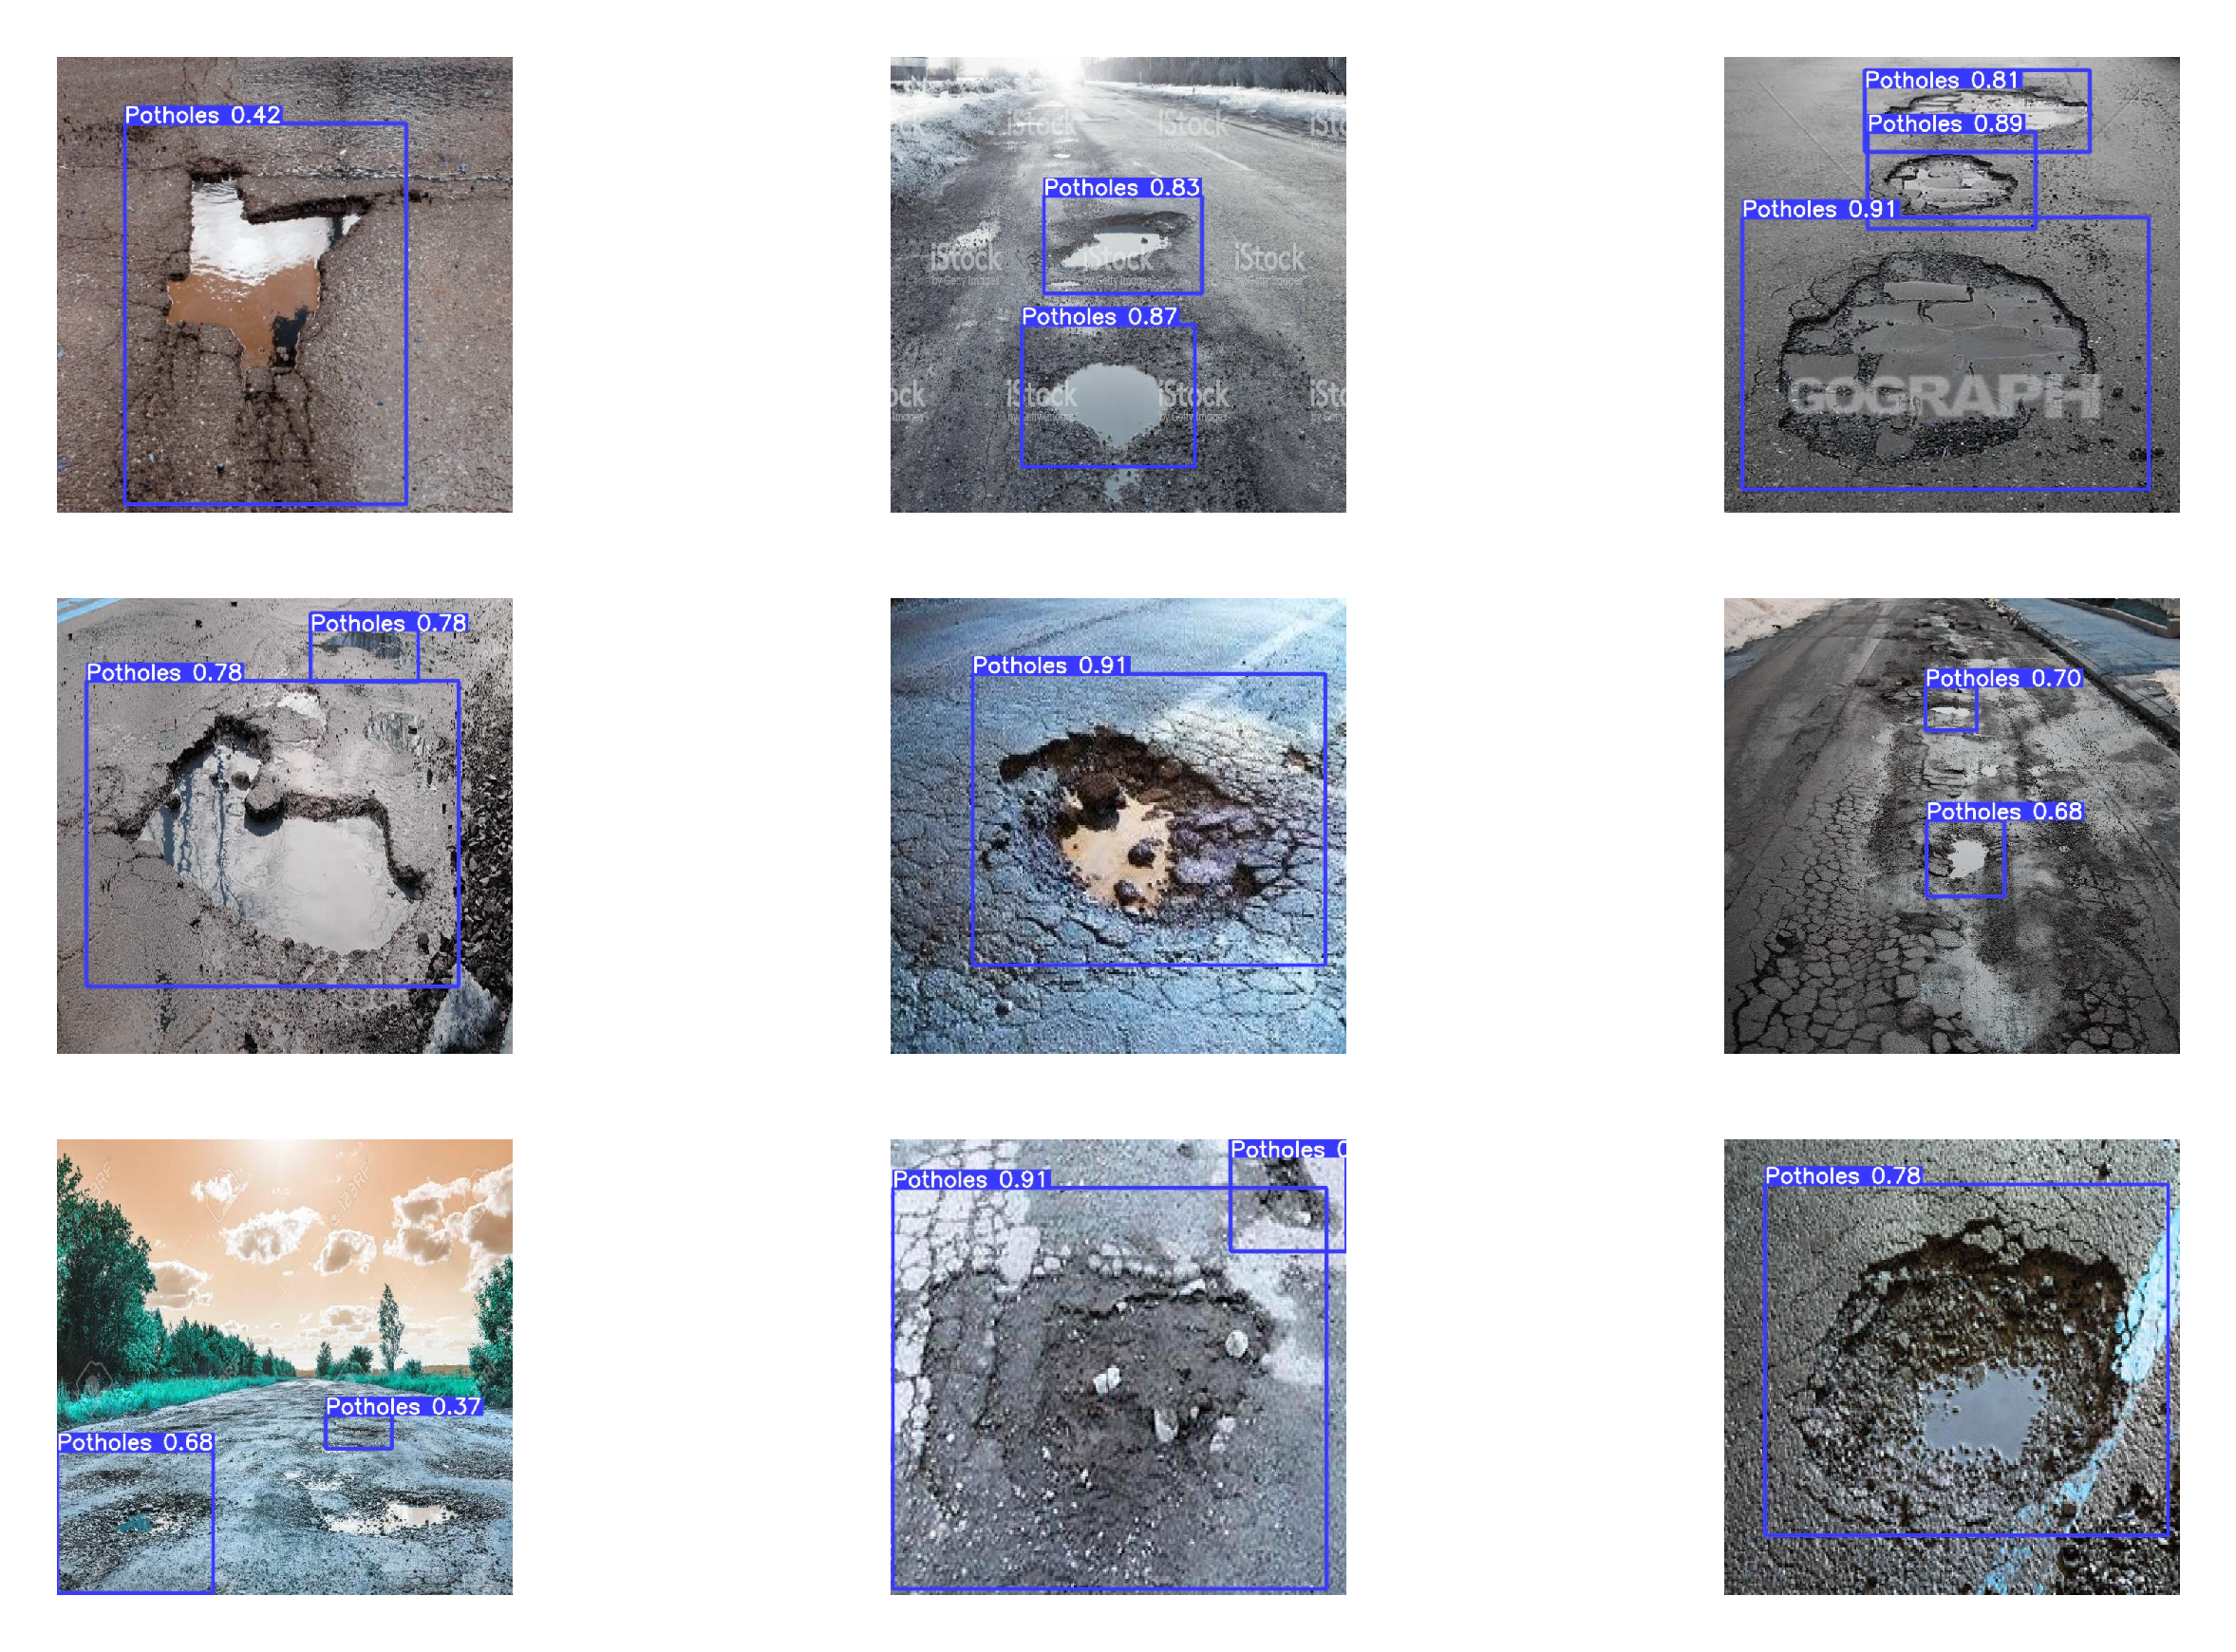

In [37]:
import glob
import matplotlib.pyplot as plt
import random
import cv2

%matplotlib inline 

predicted_paths = [path for path in glob.glob('./runs/detect/predict/' + '*.jpg')]

plt.rcParams["figure.figsize"] = (5,3)
#plt.rcParams["figure.autolayout"] = False
#plt.rcParams["figure.dpi"] = 600

fig, axs = plt.subplots(3,3,sharex=True, sharey=True)

for i in range(3):
  for j in range(3):
    img = random.choice(predicted_paths)
    img = cv2.imread(img)
   
    axs[i][j].imshow(img, interpolation='nearest')
    axs[i][j].axis('off')

fig.tight_layout()

plt.show()